# Assignment 3

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import math

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

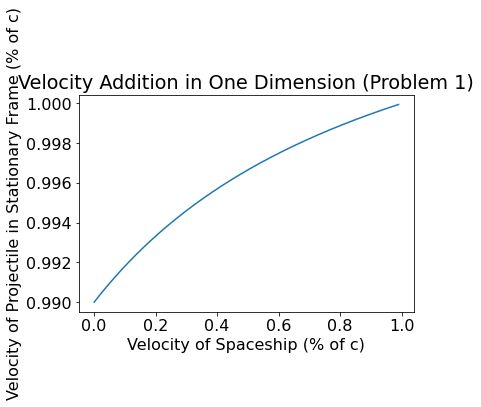

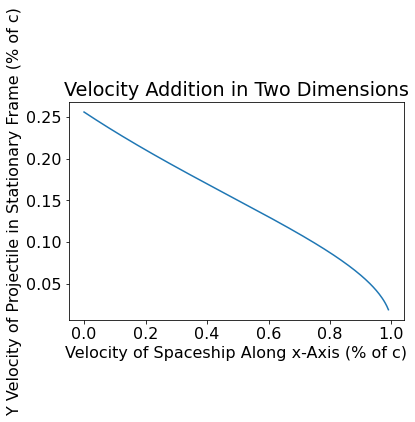

In [8]:
c0=constants.c #define c
u1=0.99*c0 #set value for u prime
pi=constants.pi
def u(v):
  return (u1+v)/(1+((v)/(c0**2))*u1)

velocity=c0*np.linspace(0,0.99,num=200) #create an array with values from 0 to 0.99c

plt.plot(velocity/c0,u(velocity)/c0)
plt.xlabel('Velocity of Spaceship (% of c)')
plt.ylabel('Velocity of Projectile in Stationary Frame (% of c)')
plt.title('Velocity Addition in One Dimension (Problem 1)')
plt.show()

theta=np.radians(15)
u1x=u1*np.cos(theta)
u1y=u1*np.sin(theta)
def gamma(v):
  return 1/np.sqrt(1-((v**2)/(c0**2)))

def uy(v):
  return u1y/((1+u1x*(v/(c0**2)))*gamma(v))

plt.plot(velocity/c0,uy(velocity)/c0)
plt.xlabel('Velocity of Spaceship Along x-Axis (% of c)')
plt.ylabel('Y Velocity of Projectile in Stationary Frame (% of c)')
plt.title('Velocity Addition in Two Dimensions')
plt.show()

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

The JWST does see the flashes as simultaneous because the light lines for
both light flashes intersects its worldline at the same point.
The Microprobe does not see these events as simultaneous because the light
lines from the two flashes do not intersect its worldline at the same point.


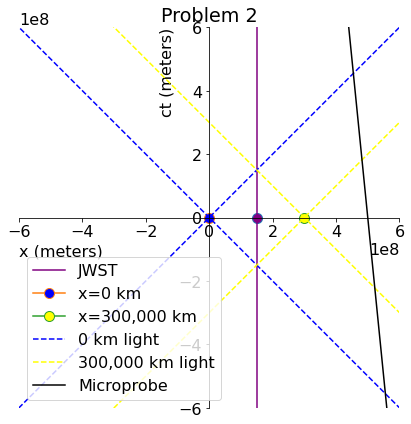

In [47]:
km=10**3
t = np.linspace(0,200,num=201,endpoint=True)-100
# This is the basic plot setup from homework 2
fig, ax=plt.subplots(figsize=(7,7)) # Creates a plot 

#Worldlines for the stationary bulbs and James Web Telescope
#ax.plot(0*t,c0*t,color='red',label='x=0 km') 
#ax.plot(0*t+300000*km,c0*t,color='blue',label='x=300,000 km')
ax.plot(150000*km,0,marker="o",markersize=10,markerfacecolor='purple')
ax.plot(0*t+150000*km,c0*t,color='purple',label='JWST')
ax.plot(0,0,marker="o",markersize=10,markerfacecolor='blue',label='x=0 km')
ax.plot(300000*km,0,marker="o",markersize=10,markerfacecolor='yellow',label='x=300,000 km')

#Worldlines for the light emitted from each flash
ax.plot(c0*t,c0*t,color='blue',label='0 km light',linestyle='dashed')
ax.plot(-c0*t,c0*t,color='blue',linestyle='dashed')
ax.plot(c0*t+300000*km,c0*t,color='yellow',label='300,000 km light',linestyle='dashed')
ax.plot(-c0*t+300000*km,c0*t,color='yellow',linestyle='dashed')

#Make Worldline for the spaceship
ax.plot(-0.1*c0*t+500000*km,c0*t,color='black',label='Microprobe')

#It would be really nice if I could loop to populate these lines and points

#These next commands mess with the borders and sizes of the axes
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_aspect('equal')
#I had to adjust the axes so that we zoom in on the two objects
#The ratio between x and y stays the same
ax.set_xlim([-6e8, 6e8])
ax.set_ylim([-6e8, 6e8])

# Next 2 are rough axis labels
ax.set_xlabel("x (meters)",loc='left')
ax.set_ylabel("ct (meters)",loc='top')
ax.legend(loc='lower left')
ax.set_title('Problem 2')
ax.plot()

print('The JWST does see the flashes as simultaneous because the light lines for')
print('both light flashes intersects its worldline at the same point.')
print('The Microprobe does not see these events as simultaneous because the light')
print('lines from the two flashes do not intersect its worldline at the same point.')